<h1>Unit 13 Live Session </center> </h1>
<h3> W203 Instructional Team </h3>
<h2> Linear Regression: Interpretation and More Testing </h2>

<img src ="https://imgs.xkcd.com/comics/curve_fitting.png">

### 0.1 Class Announcements
<ol>
<li> Quiz 2 Password: m3di@n98!

   
    
<li> Packages 
    <ol>
        <li> conda install -c r r-car
        <li> conda install -c r r-lmtest
        <li> conda install -c r r-sandwich
    </ol>
</ol>

<h3> 0.2 Getting to This Document</h3>

If you have not cloned the unit_13_ls repo yet then on the command line

1. git clone https://github.com/w203-spring-19/unit_13_ls.git 

2. cd unit_13_ls



If you have cloned this repo already then on the command line

1. cd unit_13_ls

2. git fetch


<h3> 1 Interpreting Specifications </h3>

What is the interpretation of $\beta_0$ and $\beta_1$ in each of the following specifications?

** 1.1 ** Log-level: $\log y = \beta_0 + \beta_1 x + u$

**1.2** Level-log: $y = \beta_0 + \beta_1 \log x + u$

** 1.3 ** Log-log: $\log y = \beta_0 + \beta_1 \log x + u$

** 1.4 ** Added indicator: $y = \beta_0 + \beta_1 x + \beta_2 I(x = 0) + u$

** 1.5 ** No intercept: $y = \beta_1 x + u$

** 1.6 ** Name a situation in which a no intercept regression is appropriate  

<h3> 2 Issues with MLR: Using Logarithms </h3>

Using logarithms for the dependent or independent variables is one method used by statisticians to allow nonlinear relationships between the explained and explanatory variables. 

$$ \text{ if } \;\; y = \beta_0 e^{X'\beta_1+u} \;\; \text{ then } \;\; \log(y) = \log(\beta_0) + X'\beta_1 + u $$

or 

$$ \text{ if } \;\; y = \beta_0X^\beta_1 e^{u}  \;\; \text{ then } \;\; \log(y) = \log(\beta_0) + \log(X)'\beta_1 + u $$

Another potential benefit of using logs is that taking the log of a variable often narrows its range, which is useful when working with variables that are large monetary values. 

Be  careful not to use log transformation indiscriminantly - in some cases this can create extreme values. For example, when a variable y is between zero and one and takes on values close to zero, log(y) can be very large in magnitude whereas the original variable, y, is bounded between zero and one.

<h3> 3 Hypothesis tests in MLR </h3>

Testing Hypotheses about a Single Population Parameter: The t Test
Hypothesis testing for a single coefficient is identical to the bivariate regression case with the t test statistic. The t statistic associated with any OLS coefficient can be used to test whether the corresponding unknown parameter in the population is equal to any given constant. 

In most applications, our primary interest lies in testing the null hypothesis
$H_0$: $\beta_j$ = 0, where j corresponds to any of the k independent variables. The statistic we use to test (against any alternative) is called "the" t statistic or "the" t ratio of $\hat{\beta_j}$ and is defined as $$ t_{\hat{\beta_j}}=\frac{\hat{\beta_j}}{se(\hat{\beta_j})}$$

Since $\beta_j$ measures the partial effect of $x_j$ on (the expected value of) y, after controlling for all other independent variables, this hypothesis is saying that once $x_1, x_2, ., x_{j-1},x_{j}, ., x_k$ have been accounted for, $x_j$ has no effect on the expected value of y. 

Note: We cannot state the null hypothesis as "$x_j$ does have a partial effect on y" because this is true for any value of $\beta_j$ other than zero.

** 3.1 Testing Hypotheses about a Single Linear Combination of the Parameters **

In Section 4.4, Wooldridge shows how to test hypotheses about a single
linear combination of the $b_j$ by rearranging the equation and running a regression using transformed variables. 

Remember to pay attention to the magnitude of the coefficient estimates in addition to the size of the t statistics. 

** 3.1.1 ** What is the difference between economical (or practical) and statistical significance?

** 3.2 Testing Multiple Linear Restrictions: The F Test **

To test multiple hypotheses about the underlying parameters $\beta_0, \beta_1,   ..., \beta_k$, we can use multiple restrictions to test whether a set of independent variables has no partial effect on a dependent variable.

It is often useful to test joint hypotheses together rather than use independent tests of the coefficients. For instance, the joint test that math and verbal SAT scores have no effect on W203 grades against the alternative that one or both scores has an effect. 

Tests of joint hypotheses have test statistics that are distributed according to either the F or $\chi^2$ distributions. These tests are often called Wald tests and may be quoted either as F or as $\chi^2$ statistics. 

#### 4.0 Qualitative Data: Using Dummy Variables

In the folowing identify the reference group, explain why the indicator variables have been included in the following models, and interpret all coefficients.

** 4.1 **: $wage = \beta_0 + \beta_1 educ + \beta_2 I(educ \geq 12)$

** 4.2 ** $wage = \beta_0 + \beta_1 educ + \beta_2 female$

** 4.3 ** $wage = \beta_0 + \beta_1 educ + \beta_2 female + \beta_3 educ*female$

** 4.4 ** 
$wage = \beta_0 + \beta_1 female + \beta_2 I(educ = 2) + ... + \beta_{20} I(educ = 20)$

#### 5.0  R Exercise

The file, engin.RData contains data from the Material Requirement Planning Survey carried out in Thailand during 1998.  It was collected by Thada Chaisawangwong, a former graduate student at MSU.  These data are for engineers in Thailand, and represents a more homogeneous group than data sets that consist of people across a variety of occupations.

In [1]:
library(lmtest)
library(sandwich)
library(car)
load("engin.RData")

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: carData


In [6]:
desc

variable,label
male,=1 if male
educ,highest grade completed
wage,"monthly salary, Thai baht"
swage,starting wage
exper,years on current job
pexper,previous experience
lwage,log(wage)
expersq,exper^2
highgrad,=1 if high school graduate
college,=1 if college graduate


** 5.1 ** Use visualizations to investigate the bivariate relationship between wage and educ.  Based on this analysis, what transformation, if any, would you apply to wage?

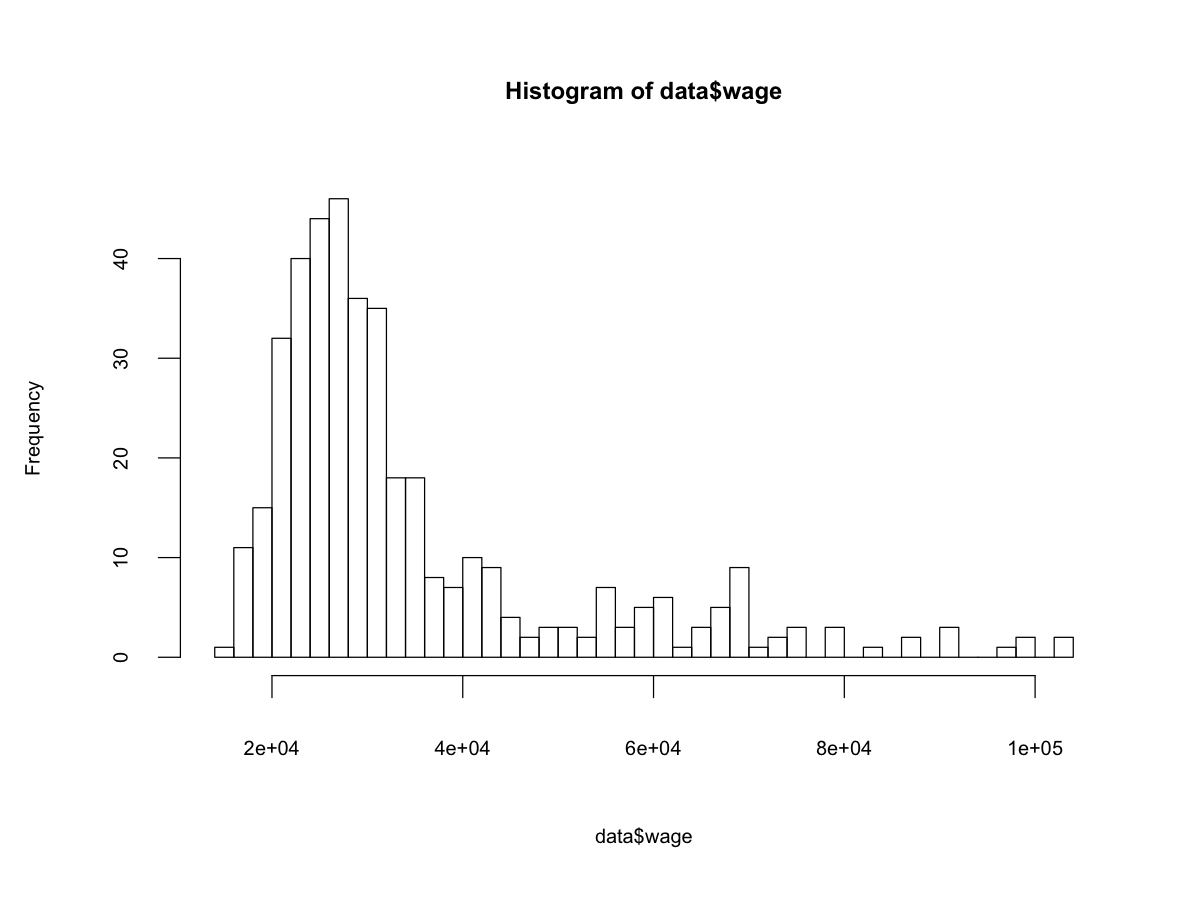

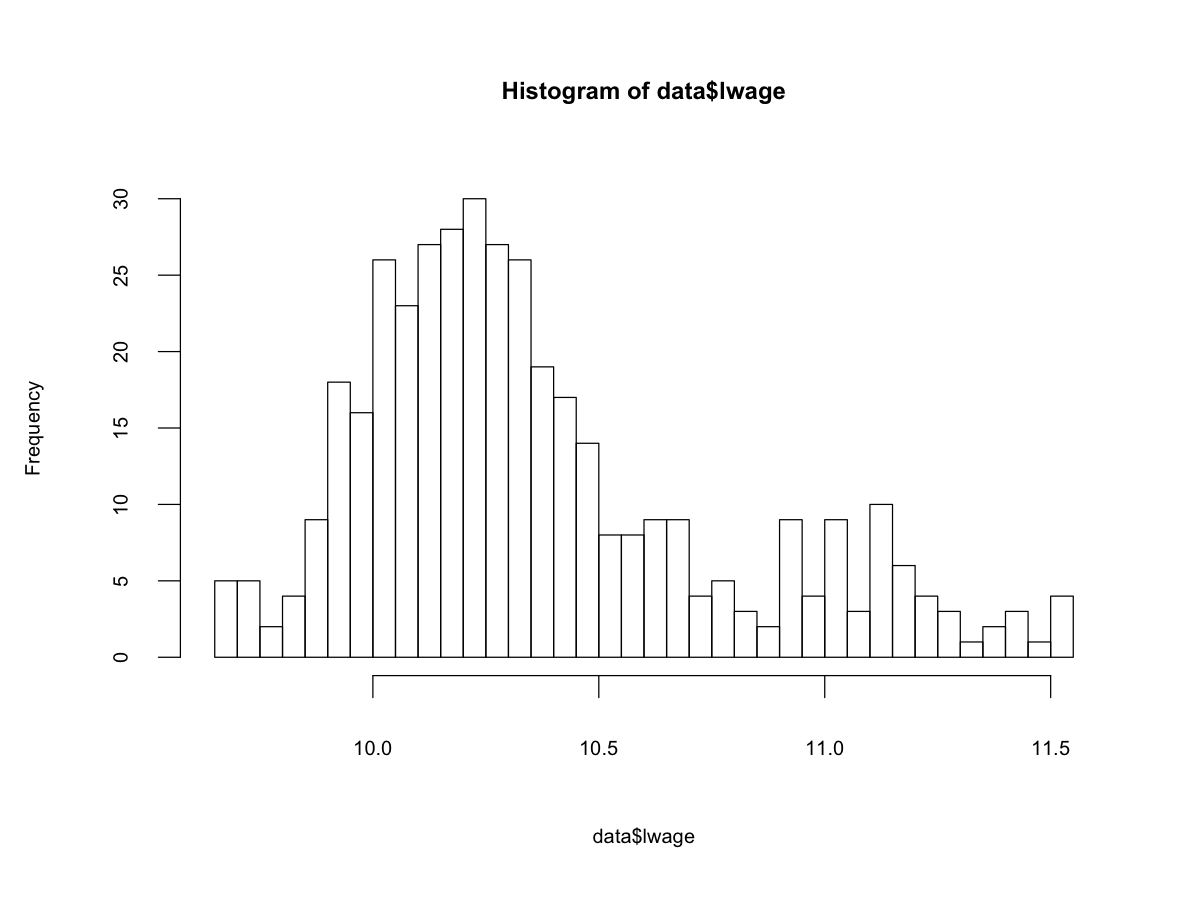

In [10]:
options(repr.plot.height = 7.5, repr.plot.width = 10, repr.plot.pointsize = 22)
hist(data$wage, breaks = 50)
hist(data$lwage, breaks = 50)

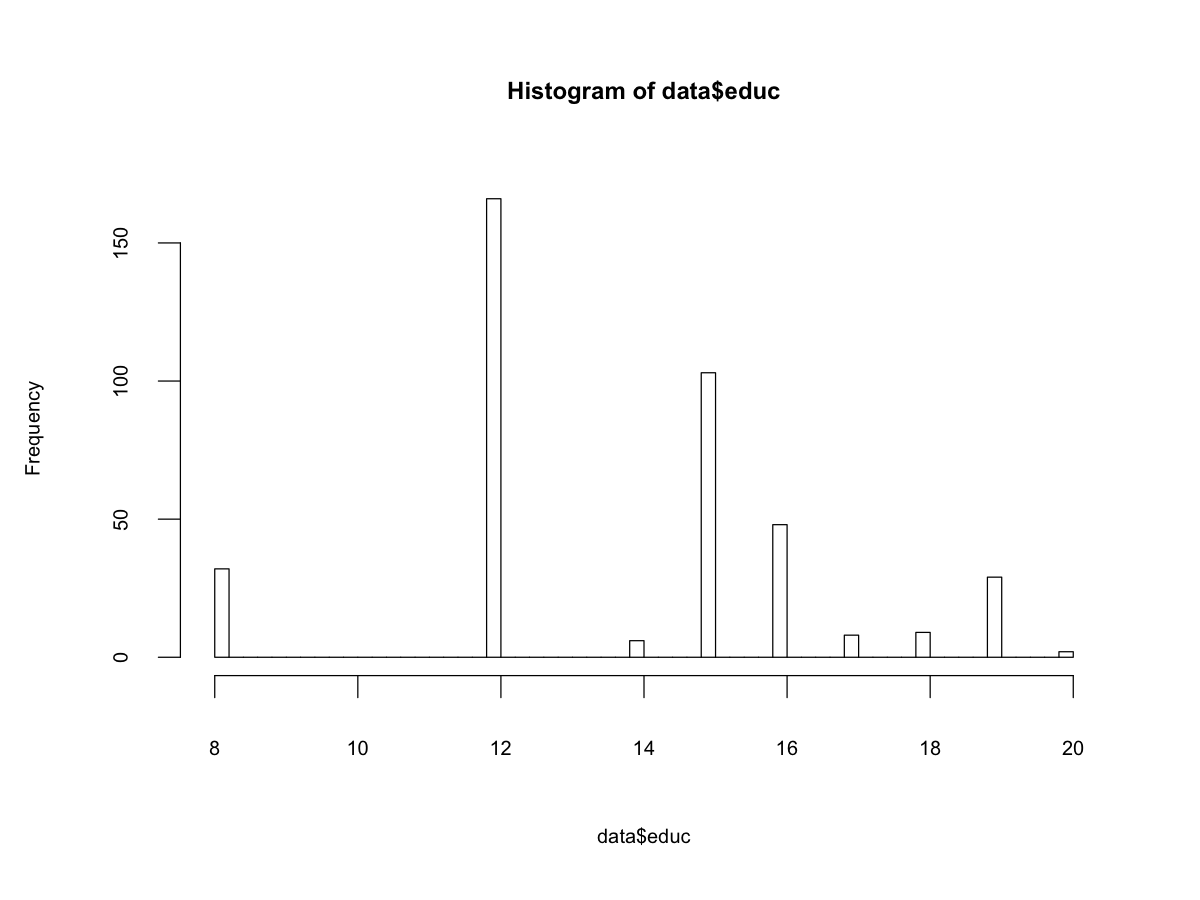

In [8]:
hist(data$educ, breaks = 50)

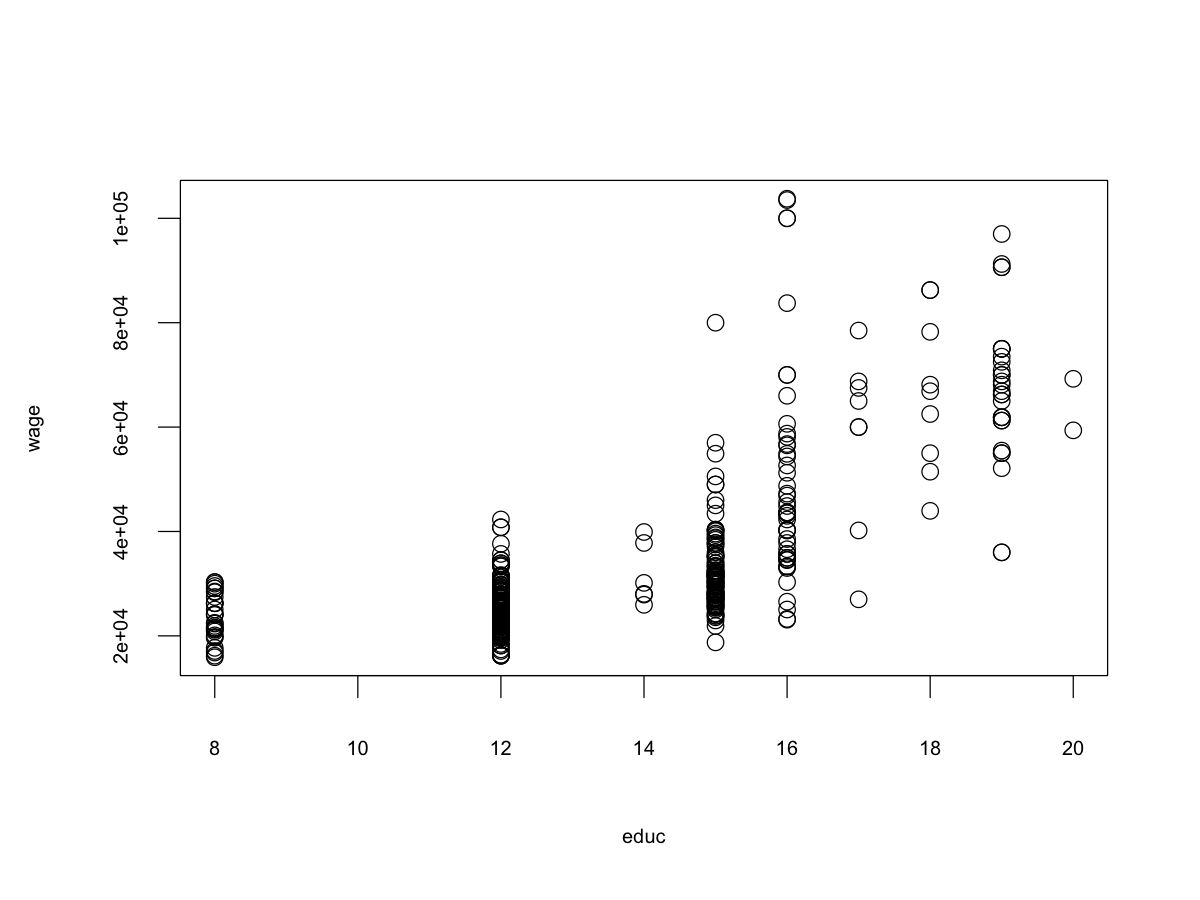

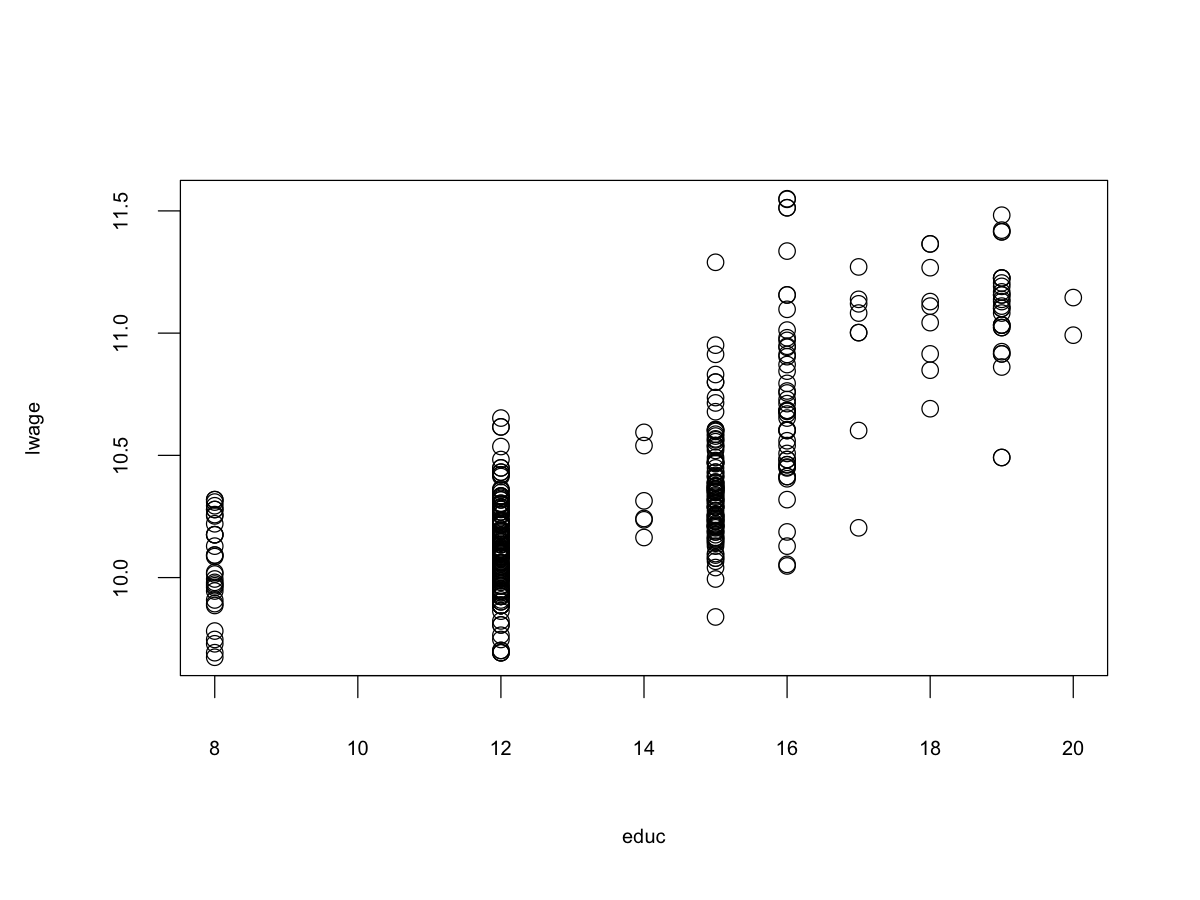

In [12]:
plot(wage~educ, data=data)
plot(lwage~educ, data=data)

** 5.2 ** Create a linear model, model1, with just male and educ on the right hand side.  Show how you would test the hypothesis that males and females have the same wages for all levels of education.

In [14]:
model1 = lm(lwage ~ male + educ, data = data)
coeftest(model1, vcov = vcovHC)


t test of coefficients:

             Estimate Std. Error  t value  Pr(>|t|)    
(Intercept) 9.0422962  0.0697548 129.6297 < 2.2e-16 ***
male        0.2209357  0.0270824   8.1579  4.46e-15 ***
educ        0.0876873  0.0055327  15.8489 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [16]:
model1x = lm(lwage ~ male + highgrad + college + grad + polytech + highdrop, data = data)
coeftest(model1x, vcov = vcovHC)


t test of coefficients:

            Estimate Std. Error  t value  Pr(>|t|)    
(Intercept) 9.983895   0.030008 332.7023 < 2.2e-16 ***
male        0.213476   0.024361   8.7631 < 2.2e-16 ***
highgrad    0.078950   0.031350   2.5184   0.01218 *  
college     0.612180   0.056781  10.7815 < 2.2e-16 ***
grad        0.864775   0.048217  17.9350 < 2.2e-16 ***
polytech    0.214558   0.034954   6.1382 2.024e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


** 5.3 ** You are considering adding two variables representing experience to the model, exper and pexper.  Show how you would test whether these variables are jointly significant.

In [18]:
model1 = lm(lwage ~ male + educ, data = data)
coeftest(model1, vcov = vcovHC)


t test of coefficients:

             Estimate Std. Error  t value  Pr(>|t|)    
(Intercept) 9.0422962  0.0697548 129.6297 < 2.2e-16 ***
male        0.2209357  0.0270824   8.1579  4.46e-15 ***
educ        0.0876873  0.0055327  15.8489 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [23]:
model2 = lm(lwage ~ male + educ + exper + pexper, data = data)
coeftest(model2, vcov = vcovHC)
linearHypothesis(model2, c("exper=0", "pexper=0"), vcov=vcovHC)


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  8.9757428  0.1250991 71.7490 < 2.2e-16 ***
male         0.2314251  0.0274754  8.4230 6.747e-16 ***
educ         0.0864418  0.0056158 15.3925 < 2.2e-16 ***
exper        0.0075838  0.0077168  0.9828   0.32632    
pexper      -0.0021549  0.0011883 -1.8134   0.07052 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Res.Df,Df,F,Pr(>F)
400,NA,NA,NA
398,2,1.930422,0.146443


In [24]:
waldtest(model1, model2, vcov=vcovHC)

Res.Df,Df,F,Pr(>F)
400,NA,NA,NA
398,2,1.930422,0.146443


** 5.4 ** You are considering adding a variable, swage, representing starting wage to the right hand side.  Explain how this would affect your ability to understand the effects of gender.

In [ ]:
model3 = lm(lwage ~ male + educ + swage, data = data)

** 5.5 ** Now show how you would alter your model to test whether marginal returns to education are the same for both men and for women.

In [25]:
model3 = lm(lwage ~ male + educ + male*educ, data = data)
coeftest(model3, vcov = vcovHC)


t test of coefficients:

              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)  9.3875129  0.1047858 89.5877 < 2.2e-16 ***
male        -0.3563124  0.1553999 -2.2929 0.0223747 *  
educ         0.0595607  0.0087278  6.8243 3.296e-11 ***
male:educ    0.0435615  0.0115654  3.7665 0.0001904 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [28]:
model5 = lm(lwage ~ male + educ + I(educ*educ) + male*educ, data = data)
coeftest(model5, vcov = vcovHC)


t test of coefficients:

                 Estimate Std. Error t value  Pr(>|t|)    
(Intercept)    10.8619567  0.1756916 61.8240 < 2.2e-16 ***
male            0.2288480  0.1290188  1.7738   0.07687 .  
educ           -0.1925844  0.0279066 -6.9010 2.044e-11 ***
I(educ * educ)  0.0104543  0.0011693  8.9407 < 2.2e-16 ***
male:educ      -0.0033711  0.0106305 -0.3171   0.75132    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


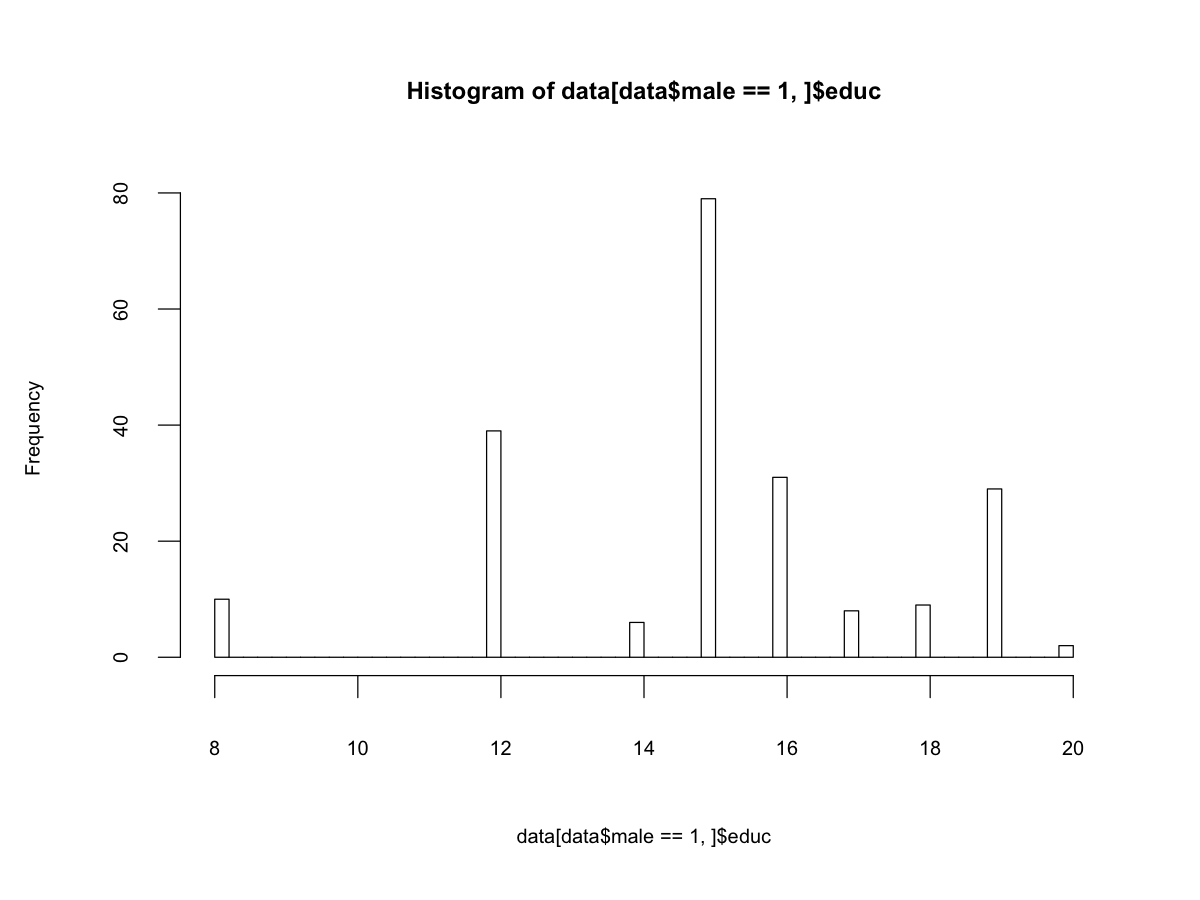

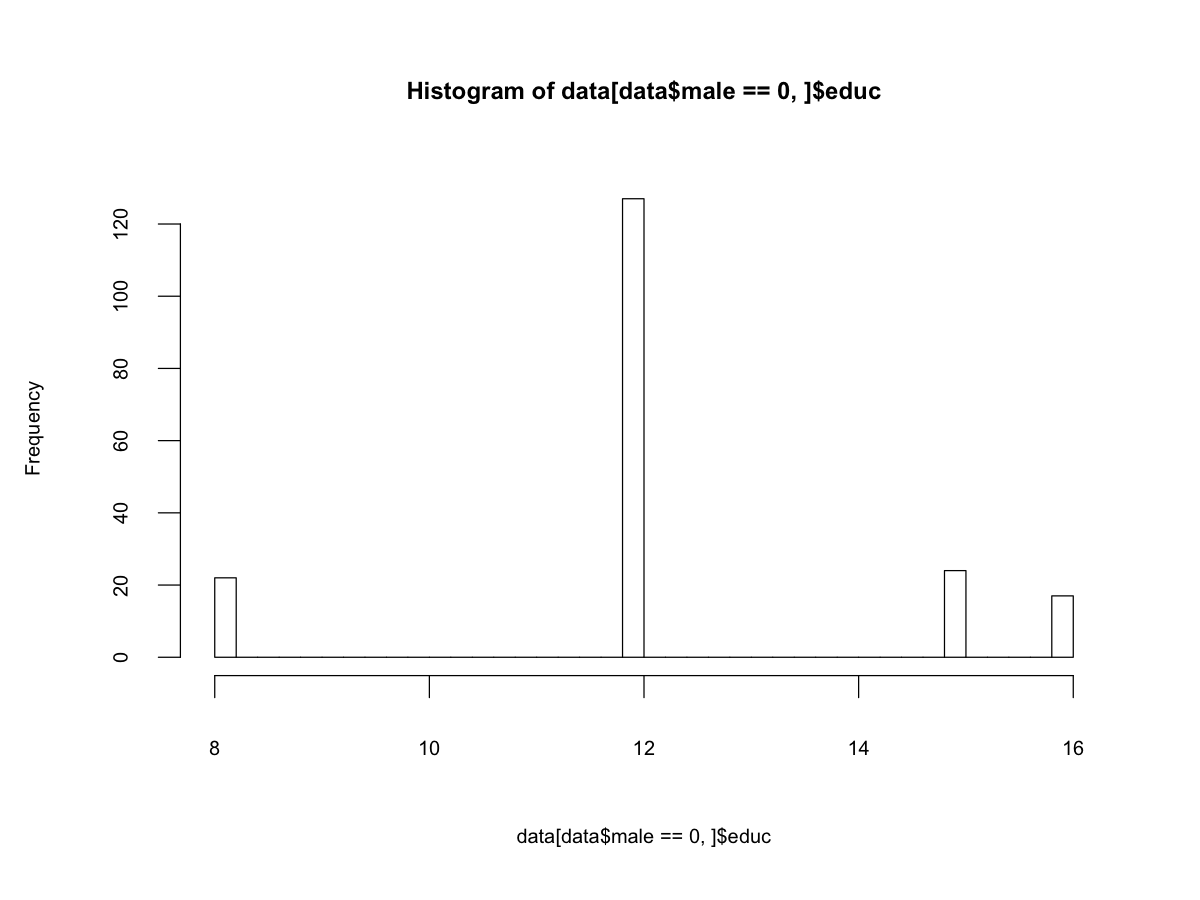

In [32]:
hist(data[data$male==1,]$educ, breaks=50)
hist(data[data$male==0,]$educ, breaks=50)